# Process Population Structure xlsx

## Loading excel and saving pickle

In [52]:
df = pd.read_excel("TF_SOC_POP_STRUCT_2020.xlsx")
df.to_pickle("TF_SOC_POP_STRUCT_2020.pkl") # optional compression, but local memory so not necessary

## Processing raw dataset

### Remove unwatned rows

In [162]:
filtered = df.filter(regex = "[^F][^R]$").filter(regex = ".*_(?!(.*REFNIS))")
filtered.drop(["TX_NATLTY_NL", "CD_CIV_STS"], axis = 1, inplace = True)

### Rename columns

In [163]:
rename_dict = {"TX_DESCR_NL": "city_name", "TX_ADM_DSTR_DESCR_NL": "arrondissement_name", "TX_PROV_DESCR_NL": "province_name",
               "TX_RGN_DESCR_NL": "region_name", "CD_SEX": "sex", "CD_NATLTY": "nat", "TX_CIV_STS_NL": "civil_status",
               "CD_AGE": "age", "MS_POPULATION": "pop" }
filtered = filtered.rename(rename_dict, axis = 1)

### Readjust data and datatypes

In [168]:
filtered["arrondissement_name"] = filtered["arrondissement_name"].apply(lambda x: x.replace("Arrondissement ", ""))
filtered["province_name"] = filtered["province_name"].apply(lambda x: x.replace("Provincie ", ""))
filtered = filtered.convert_dtypes()
cat_dict = {"city_name": "category", "arrondissement_name": "category", "province_name": "category", "region_name": "category", "sex": "category",
           "civil_status": "category", "nat": "category"}
filtered = filtered.astype(cat_dict)

## Export processed dataset to pickle

In [170]:
filtered.to_pickle("population_BE_2020_processed.pkl")

## Playground

In [171]:
play = filtered

In [178]:
mpl.rcParams["figure.figsize"] = 10, 8
mpl.style.use("ggplot")

In [176]:
sex_vs_age = play.pivot_table(index = "sex", columns = ["age"], values = "pop", aggfunc = np.sum)
sex_vs_age.fillna(0, inplace = True)
sex_vs_age

age,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
sex,,,,,,,,,,,,,,,,,,,,,
F,57524,58346,59234,60530,61387,62860,63286,64997,65568,66705,...,188,137,69,69,22,12,7,2,3,4
M,59640,60764,61849,63523,64141,66207,66434,67770,68586,69717,...,25,16,8,8,2,2,1,0,0,0


<AxesSubplot:xlabel='age', ylabel='pop'>

<Figure size 720x576 with 0 Axes>

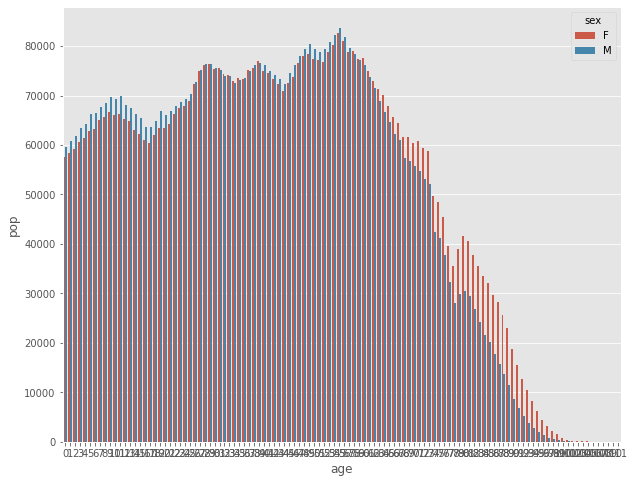

In [243]:
plt.clf()
fig, ax = plt.subplots()
unstacked = sex_vs_age.unstack().reset_index().rename({"level_1": "sex", 0: "pop"}, axis = 1)
# sns.histplot(data = unstacked, x = "age", hue = "sex", y = "pop", multiple="fill", bins = unstacked.age.max())
sns.barplot(data = unstacked, x = "age", y = "pop", hue = "sex")

<AxesSubplot:xlabel='age', ylabel='pop'>

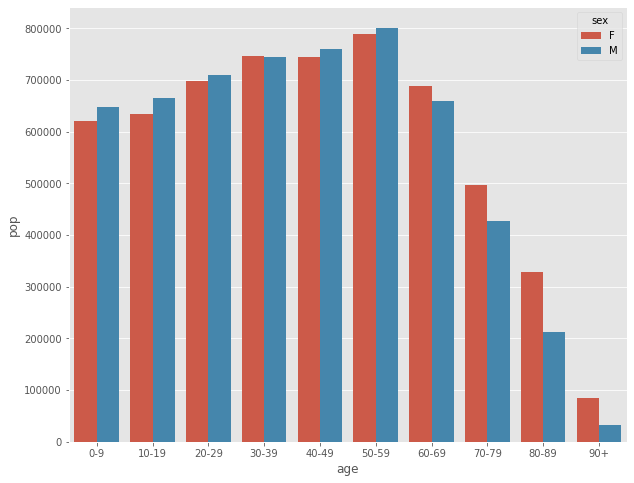

In [272]:
age_cat = pd.DataFrame()
for k, v in sex_vs_age.iteritems():
    if int(k) % 10 == 0:
        age_cat[k//10] = v
    elif int(k) % 10 == 9:
        age_cat[k//10] += v
        rename_dict = {(k//10): f"{k-9}-{k}"}
        age_cat.rename(rename_dict, axis = 1, inplace = True)
    else:
        age_cat[k//10] += v
age_cat["90+"] = age_cat["90-99"] + age_cat["100-109"] + age_cat[11]
age_cat.drop(["90-99", "100-109", 11], axis = 1, inplace = True)
age_cat
unstacked = age_cat.unstack().reset_index().rename({"level_1": "sex", "level_0": "age", 0: "pop"}, axis = 1)
sns.barplot(data = unstacked, x = "age", y = "pop", hue = "sex")